<div style="width: 400px; height: 160px;">
    <img src="rplogo_small.png" width="100%" height="100%" align="left">
</div>

###     TIPP - AAI Assignement (Deep Learning Fundamentals)<br>Due Date: 21 February 2020
###     Submitted By: <u>KOAY</u> SENG TIAN<br>Email: sengtian@yahoo.com


## Question 2 (Testing #1 & Testing #2)

In [1]:
import argparse
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pickle

# set verbose=0 to skip the charts and other information
# set verbose=1 to see chart and other information
#verbose=0
verbose=1

# uncomment one of the 2 lines to test either datatest.txt or datatest2.txt
testdata_file = 'datatest.txt'
#testdata_file = 'datatest2.txt'


In [2]:
# You can run this either as a 1) jupyter note or 2) File -> Download as -> Python (.py) 
#
# 1) Jupyter notebook: 
#    Settings: 1) set verbose (see above) to either 0 (no charts) or 1 (charts and other information)
#              2) comment / uncomment test_datafile to use datatest.txt or datatest2.txt to test the model
#
# 2) Python script (.py):
#        1) open a terminal (command prompt in windows that has python interpreter)
#        2) python Question2_Test_DLF.py -h
# 
#           usage: Question #2 Testing [-h] [-v VERBOSE] [-t TEST]
#
#           optional arguments:
#              -h, --help            show this help message and exit
#              -v VERBOSE, --verbose VERBOSE
#                                   turn on or off verbose mode (default: 1)
#              -t TEST, --test TEST  (0) for datatest.txt and (1) datatest1.txt
#        3) Example: python Question2_Test_DLF.py -v 0 -t 1 OR
#                    python Question2_Test_DLF.py -v 1 -t 2
#
if __name__ == '__main__' and '__file__' in globals():
    ap = argparse.ArgumentParser('Question #2 Testing')
    ap.add_argument('-v', '--verbose', default='0', type=int, help='turn off(0, default) or on(1) verbose mode')
    ap.add_argument('-t', '--test', default='0', type=int, help='(0, default) for datatest.txt and (1) datatest1.txt')

    args = vars (ap.parse_args())

    verbose = 0
    if args.get('verbose') == 1:
        verbose=1
        
    if args.get('test') == 1:
        testdata_file = 'datatest2.txt'
        
    print('Verbose=', verbose, ' Test data file=', testdata_file)
    print()
    

In [3]:
import keras

model_filename = 'model.pkl'
scaler_filename = 'scaler.pkl'

model_dir = os.path.join(os.getcwd(), 'model')
data_dir = os.path.join(os.getcwd(), 'data')


Using TensorFlow backend.


In [4]:
# load model and scaler
with open(os.path.join(model_dir, model_filename), 'rb') as model_file:
    model = pickle.load(model_file)
    print('Load model.')
    
with open(os.path.join(model_dir, scaler_filename), 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)
    print('Load scaler.')
    











Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Load model.
Load scaler.


In [5]:
test_df = pd.read_csv(os.path.join(data_dir, testdata_file))
test_df['date']= pd.to_datetime(test_df['date']) 
test_df.sort_values(by='date', inplace=True, ascending=True)

if verbose==1:
    print('Test data shape=', test_df.shape)
    print()
    print('The time series starts from: ', test_df.date.min())
    print('The time series ends on: ', test_df.date.max())
    print()

Test data shape= (2665, 7)

The time series starts from:  2015-02-02 14:19:00
The time series ends on:  2015-02-04 10:43:00



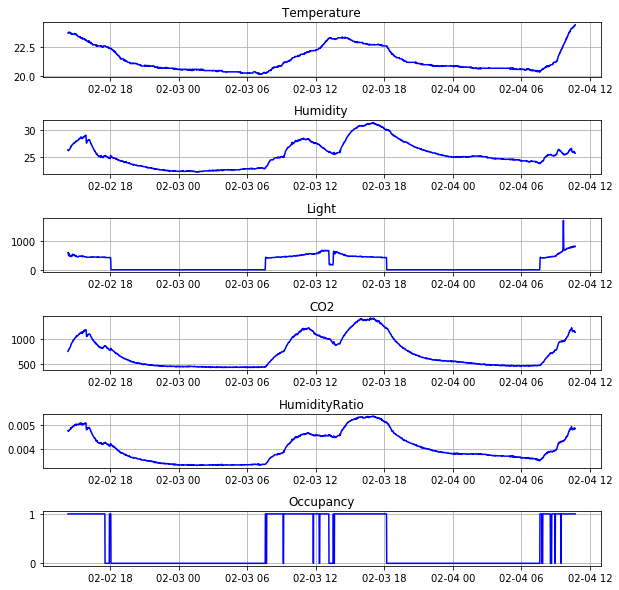

In [6]:
import mycharts

if verbose==1:
    mycharts.chart01(test_df.columns[1:], test_df, 'blue')

In [7]:
#set the dat as index
test_df = test_df.set_index('date')   

In [8]:
if verbose==1:
    print('-----HEAD-(Before Shifting)----')
    print(test_df.head())
    print()
    print('-----TAIL-(Before Shifting)----')
    print(test_df.tail())
    print()
    print(test_df.dtypes)

-----HEAD-(Before Shifting)----
                     Temperature  Humidity       Light         CO2  \
date                                                                 
2015-02-02 14:19:00      23.7000    26.272  585.200000  749.200000   
2015-02-02 14:19:59      23.7180    26.290  578.400000  760.400000   
2015-02-02 14:21:00      23.7300    26.230  572.666667  769.666667   
2015-02-02 14:22:00      23.7225    26.125  493.750000  774.750000   
2015-02-02 14:23:00      23.7540    26.200  488.600000  779.000000   

                     HumidityRatio  Occupancy  
date                                           
2015-02-02 14:19:00       0.004764          1  
2015-02-02 14:19:59       0.004773          1  
2015-02-02 14:21:00       0.004765          1  
2015-02-02 14:22:00       0.004744          1  
2015-02-02 14:23:00       0.004767          1  

-----TAIL-(Before Shifting)----
                     Temperature   Humidity  Light      CO2  HumidityRatio  \
date                          

In [9]:
# shift the data 'backward' by 1
# so as to perform future occupancy forecasting 
test_df.Occupancy = test_df.Occupancy.shift(-1)

In [10]:
# drop the last row as occupancy is Nan
test_df.drop(test_df.tail(1).index, inplace=True)
test_df.Occupancy.astype('int64')


date
2015-02-02 14:19:00    1
2015-02-02 14:19:59    1
2015-02-02 14:21:00    1
2015-02-02 14:22:00    1
2015-02-02 14:23:00    1
                      ..
2015-02-04 10:38:00    1
2015-02-04 10:38:59    1
2015-02-04 10:40:00    1
2015-02-04 10:40:59    1
2015-02-04 10:41:59    1
Name: Occupancy, Length: 2664, dtype: int64

In [11]:
if verbose==1:
    # the below prints are meant for integrity 
    # checking i.e. compare before and after shifting
    print('Last row was dropped')
    print('Shape=', test_df.shape)
    print()
    print('-----HEAD-(After Shifting)----')
    print(test_df.head())
    print()
    print('-----TAIL-(After Shifting)----')
    print(test_df.tail())
    print()
    print(test_df.dtypes)

Last row was dropped
Shape= (2664, 6)

-----HEAD-(After Shifting)----
                     Temperature  Humidity       Light         CO2  \
date                                                                 
2015-02-02 14:19:00      23.7000    26.272  585.200000  749.200000   
2015-02-02 14:19:59      23.7180    26.290  578.400000  760.400000   
2015-02-02 14:21:00      23.7300    26.230  572.666667  769.666667   
2015-02-02 14:22:00      23.7225    26.125  493.750000  774.750000   
2015-02-02 14:23:00      23.7540    26.200  488.600000  779.000000   

                     HumidityRatio  Occupancy  
date                                           
2015-02-02 14:19:00       0.004764        1.0  
2015-02-02 14:19:59       0.004773        1.0  
2015-02-02 14:21:00       0.004765        1.0  
2015-02-02 14:22:00       0.004744        1.0  
2015-02-02 14:23:00       0.004767        1.0  

-----TAIL-(After Shifting)----
                     Temperature  Humidity  Light      CO2  HumidityRat

In [12]:
X = test_df.iloc[:,  : -1].copy().to_numpy()
y = test_df.iloc[:, -1 ].copy().to_numpy()

In [13]:
X = scaler.transform(X)

#reshape for LSTM's format samples, timestep and features
X = X.reshape(-1, 1, 5)

In [14]:
pred = model.predict(X)
pred_classes = model.predict_classes(X)

In [15]:
pred_classes_squeezed = np.squeeze(pred_classes)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

print('-----------------------------------------------------')
print('Test file: ', testdata_file)
print('-----------------------------------------------------')
print('Confusion Matrix:')
print(pd.crosstab(y, pred_classes_squeezed, rownames=['True'], colnames=['Predicted'], margins=True))
print('\n-----------------------------------------------------')
print('Classification Report:')
print(classification_report(y, pred_classes_squeezed))

-----------------------------------------------------
Test file:  datatest.txt
-----------------------------------------------------
Confusion Matrix:
Predicted     0     1   All
True                       
0.0        1636    57  1693
1.0           5   966   971
All        1641  1023  2664

-----------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      1693
         1.0       0.94      0.99      0.97       971

    accuracy                           0.98      2664
   macro avg       0.97      0.98      0.98      2664
weighted avg       0.98      0.98      0.98      2664



In [17]:
# using datatest.txt, the accuracy is 98%, precision (0=100%, 1=94%)
# using datatest2.txt, the accuracy is 99%, precision (0=100%, 1=97%)